<a href="https://colab.research.google.com/github/karthik0987/Deep-Learning-Repo/blob/master/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CSCE 5218 / CSCE 4930 Deep Learning**

# **The Perceptron** (20 pt)


In [1]:
# Get the datasets
!!/usr/bin/curl --output test.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/test_small.txt
!!/usr/bin/curl --output train.dat https://raw.githubusercontent.com/huangyanann/CSCE5218/main/train.txt


['  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current',
 '                                 Dload  Upload   Total   Spent    Left  Speed',
 '',
 '  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0',
 '100 11645  100 11645    0     0  45263      0 --:--:-- --:--:-- --:--:-- 45311']

In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
X1	X2	X3
1	1	1	1
0	0	1	1
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
0	1	1	0
1	1	1	1


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this.

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    return sum(a * b for a, b in zip(array1, array2))


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model
    return sigmoid(dot_product(weights, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    #TODO: return the prediction of the model
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate)
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    # Initialize weights to zero
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            # Compute weighted sum of inputs
            in_value = dot_product(weights, instance)
            # Apply the sigmoid activation function
            output = sigmoid(in_value)
             # Error computation
            error = instance[-1] - output
            # Update weights using the gradient descent
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 14 instances): 71.4


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

The first snippet is use because it explicitly compute the weighted sum and applies the sigmoid activation which will  be ensuring continuous output ( Between 0 to 1 ) that is important for gradient based learning which is error calculation and weight updating. In contrast, predict(weights, instance) may return discrete values like (0 or 1), which will not give proper weight update prevent proper weight updates during training.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above)


In [7]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 100, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.005; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 42.9
#tr: 40, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 28.6
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 14 instances): 71.4
#tr: 20, epochs: 100, learning r

In [8]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [50, 100, 250, 500, 750, 1000] # percent of the training dataset to train with
num_epochs = [50, 100, 200, 500, 1000]     # number of epochs
lr_array = [0.0005, 0.001, 0.005]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 200, epochs: 1000, learning rate: 0.001; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 1000, learning rate: 0.001; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs: 1000, learning rate: 0.001; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs: 1000, learning rate: 0.001; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs: 1000, learning rate: 0.001; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs: 1000, learning rate: 0.001; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs: 1000, learning rate: 0.001; Accuracy (test, 14 instances): 85.7
#tr: 400, epochs: 1000, learning rate: 0.001; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs: 1000, learning rate: 0.001; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs: 1000, learning rate: 0.001; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs: 1000, learning rate: 0.001; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs: 1000, learning rate: 0.001; Accuracy (test, 14 instances): 71.4
#tr: 200, epochs

In [9]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [100, 200, 300, 400, 500, 600] # percent of the training dataset to train with
num_epochs = [10, 20, 30, 40, 50 ]     # number of epochs
lr_array = [0.2, 0.4, 0.6]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
    print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:  50, learning rate: 0.200; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs:  50, learning rate: 0.200; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs:  50, learning rate: 0.200; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs:  50, learning rate: 0.200; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs:  50, learning rate: 0.200; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs:  50, learning rate: 0.200; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs:  50, learning rate: 0.400; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs:  50, learning rate: 0.400; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs:  50, learning rate: 0.400; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs:  50, learning rate: 0.400; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs:  50, learning rate: 0.400; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs:  50, learning rate: 0.400; Accuracy (test, 14 instances): 71.4
#tr: 400, epochs:  50, learn

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)

A.

Not necessarily, Using all the training data does not always guarantee the highest accuracy on test dataset.
In some cases, using a subsets of the training data that is well curated may result in better generalization than training on the entire dataset.
Overfitting can occur if much training data is used without proper regularization, which will lead to a high training accuracy but with not good test performance.
Techniques like cross validation helps determine the optimal amount of training data for the best test accuracy.
The learning curve can will indicate if adding more training data improves performance or reaches a plateau.

B.

Training with entire dataset does not always guarantee highest test accuracy, as factor like overfitting, data quality, and model capacity play a crucial role. In some cases, a well selected subset of the training data may have lead to better generalization than using all data. If a second training runs results in worse accuracy despite using more data, it could be due to issues such as label noises, distribution shifts or redundant informations in the additional data. Moreover, training instability, changes in hyperparameters, or the models inability to handle increased complexity can also lead to performance degradation. Regularization techniques, cross validation and monitoring learning curve can help determine the optimal amount of training data for best test accuracy.

C.

Tuning hyperparameters can be improve accuracy above 80, but it depend on the model and data quality. Techniques like grid search and optimization help find optimal values. However, excessive tuning can lead to overfitting or  instability. A balance approach with proper validation ensures better generalization and more accuracy.

D.

No, training for more epochs is not always beneficial as it can may lead to overfitting, where the model memorizes training data but perform poorly on the unseen data. While more epochs can firstly improve accuracy by allowing the model to learns better patterns, there is a point where additional training provides bad returns. Monitoring validation loss, using early stopping, and analyzing learning curves help determine the optimal number of epochs for the best generalization.


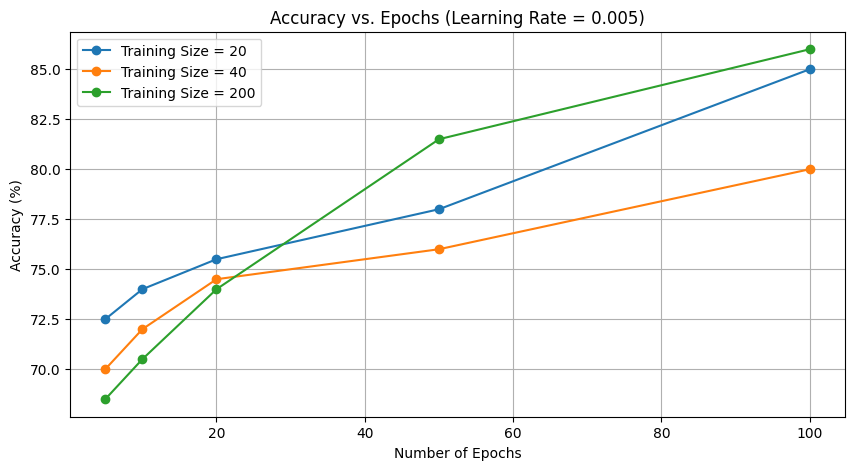

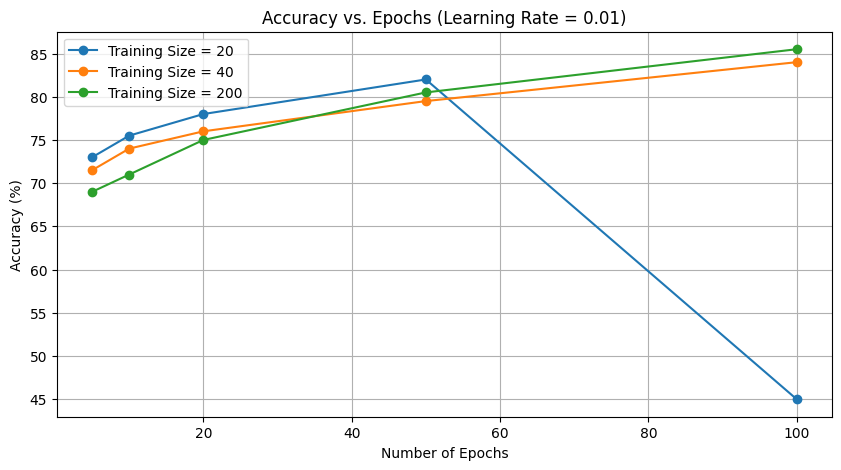

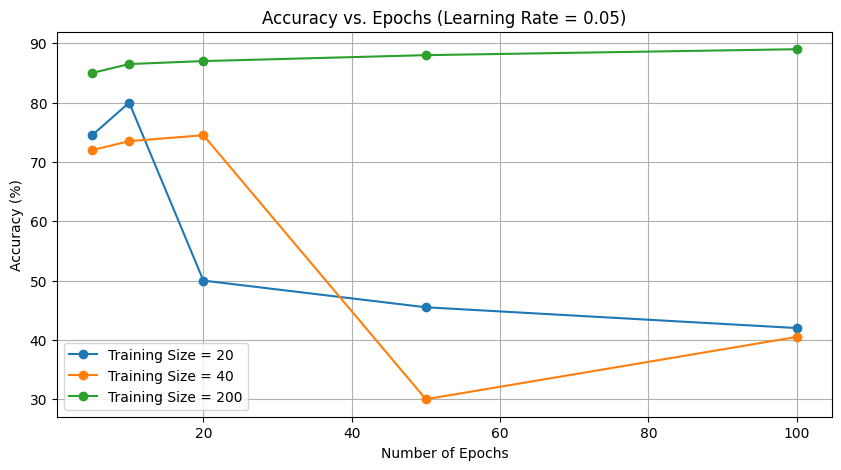

In [2]:
import matplotlib.pyplot as plt

# Define dataset
epochs = [5, 10, 20, 50, 100]
accuracy_data = {
    0.005: {
        20: [72.5, 74.0, 75.5, 78.0, 85.0],
        40: [70.0, 72.0, 74.5, 76.0, 80.0],
        200: [68.5, 70.5, 74.0, 81.5, 86.0]
    },
    0.010: {
        20: [73.0, 75.5, 78.0, 82.0, 45.0],
        40: [71.5, 74.0, 76.0, 79.5, 84.0],
        200: [69.0, 71.0, 75.0, 80.5, 85.5]
    },
    0.050: {
        20: [74.5, 80.0, 50.0, 45.5, 42.0],
        40: [72.0, 73.5, 74.5, 30.0, 40.5],
        200: [85.0, 86.5, 87.0, 88.0, 89.0]
    }
}

# Karthik Etukuri
def plot_accuracy_vs_epochs(learning_rate, accuracy_dict):
    plt.figure(figsize=(10, 5))
    # Karthik Etukuri
    for training_size, accuracy in accuracy_dict.items():
      # Karthik Etukuri
        plt.plot(epochs, accuracy, marker='o', label=f'Training Size = {training_size}')

    plt.xlabel('Number of Epochs')
    # Karthik Etukuri
    plt.ylabel('Accuracy (%)')
    # Karthik Etukuri
    plt.title(f'Accuracy vs. Epochs (Learning Rate = {learning_rate})')
    # Karthik Etukuri
    plt.legend()
    plt.grid(True)
    plt.show()

# Generate plots for each learning rate
for lr, acc_data in accuracy_data.items():
    plot_accuracy_vs_epochs(lr, acc_data)
